In [1]:
!pip install diffusers transformers xformers git+http://github.com/huggingface/accelerate.git

  Cloning http://github.com/huggingface/accelerate.git to /tmp/pip-req-build-ko_tytfp
  Running command git clone --filter=blob:none --quiet http://github.com/huggingface/accelerate.git /tmp/pip-req-build-ko_tytfp
  Resolved http://github.com/huggingface/accelerate.git to commit 16488be9a490e97012ccec5f466c8abc365258b1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.

In [2]:
!pip install opencv-contrib-python
!pip install controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00
  Created wheel for controlnet_aux: filename=controlnet_aux-0.0.7-py3-none-any.whl size=274341 sha256=b246edec602424be55c6a1c20b48101ee52b5b7c85bde9d6cfc05eb3c3073ed0
  Stored in directory: /root/.cache/pip/wheels/1e/3e/93/6678b4c0bc2ec31d53409b25d4189cbb08bae843e8b2b78e52
Successfully built controlnet_aux
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xform

In [3]:
!ls /content

mimage001.jpg  sample_data


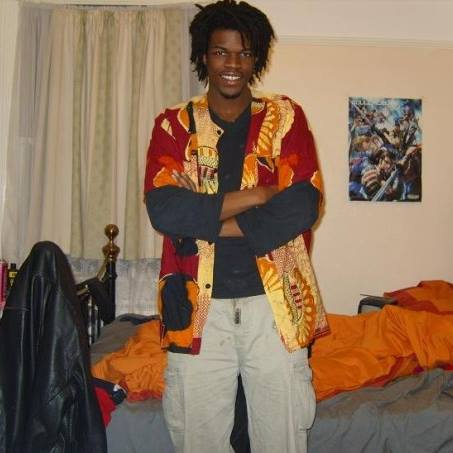

In [44]:
from diffusers.utils import load_image

image = load_image(
    "/content/mimage002.jpg"
)
image

In [5]:
import cv2
from PIL import Image
import numpy as np

In [45]:
image = np.array(image)

In [43]:
low_threshold = 100
high_threshold = 200

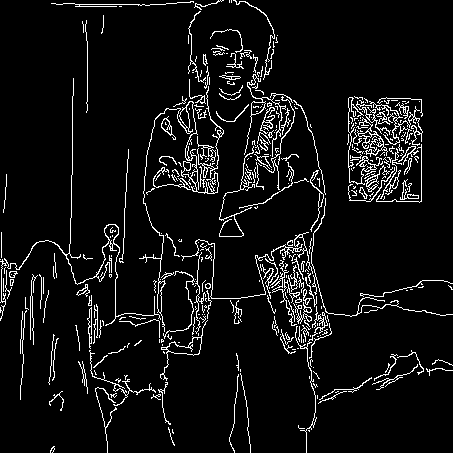

In [46]:
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

In [50]:
image = cv2.Canny(image, low_threshold, high_threshold) # reshapes it to just 2 dimensions (height and width, removes depth)
image.shape

(453, 604)

In [51]:
image = image[:, :, None] #adds extra depth dimension, but of size one
image.shape

(453, 604, 1)

In [52]:
image = np.concatenate([image, image, image], axis=2) # concatenates image three times along final depth dimension producing final depth of 3
image.shape

(453, 604, 3)

In [31]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
) # controlnet trained on canny images

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [32]:
from diffusers import DDIMScheduler

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [33]:
pipe.enable_model_cpu_offload() # GPU memory management

In [34]:
pipe.enable_xformers_memory_efficient_attention() # cross attention and self attention layers need large aounts of memory and are slow, this prevents/mitigates that

In [38]:
prompt = ["anime style, blue eyes, white skin, best quality, extremely detailed"]

In [47]:
output = pipe(
    prompt,
    canny_image,
    negative_prompt=["deformed"],
    num_inference_steps=20,
)

  0%|          | 0/20 [00:00<?, ?it/s]

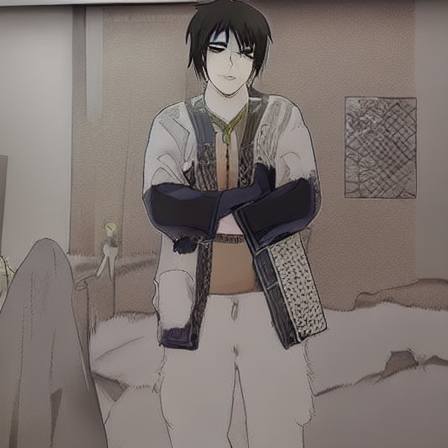

In [48]:
output[0][0]

In [64]:
prompt = ["fish, red body, best quality, extremely detailed"]

image1 = load_image("/content/fish.png")

In [58]:
output = pipe(
    prompt,
    canny_image,
    negative_prompt=[""],
    num_inference_steps=50,
)

  0%|          | 0/50 [00:00<?, ?it/s]

In [59]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-scribble", torch_dtype=torch.float16
) # controlnet trained on scribble images

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [60]:
pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

In [62]:
image1.shape

(663, 575, 3)

In [65]:
output = pipe(
    prompt,
    image1,
    negative_prompt=[""],
    num_inference_steps=50,
    guidance_scale = 15
)

  0%|          | 0/50 [00:00<?, ?it/s]

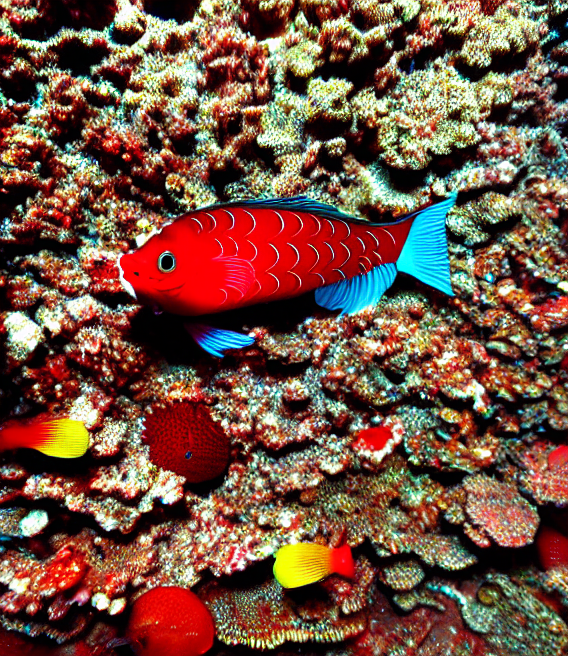

In [66]:
output[0][0]

In [82]:
prompt1 = ["anime, boy, best quality, extremely detailed"] * 4
image2 = load_image("/content/boy.png")

In [83]:
output = pipe(
    prompt1,
    image2,
    negative_prompt=[""] * 4,
    num_inference_steps=20,
    guidance_scale = 15
)

  0%|          | 0/20 [00:00<?, ?it/s]

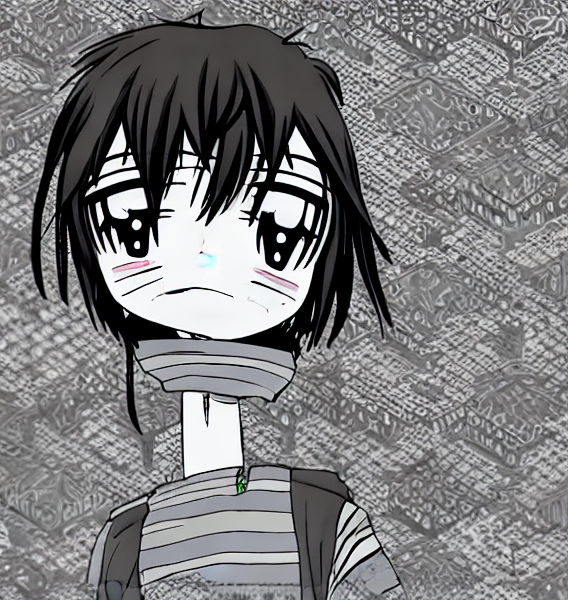

In [88]:
output[0][0]

In [89]:
output = pipe(
    prompt1,
    image2,
    negative_prompt=[""] * 4,
    num_inference_steps=20,
    guidance_scale = 7,
    controlnet_conditioning_scale = 0.2 # specify importance of sketch, or condition passed through controlnet
)

  0%|          | 0/20 [00:00<?, ?it/s]

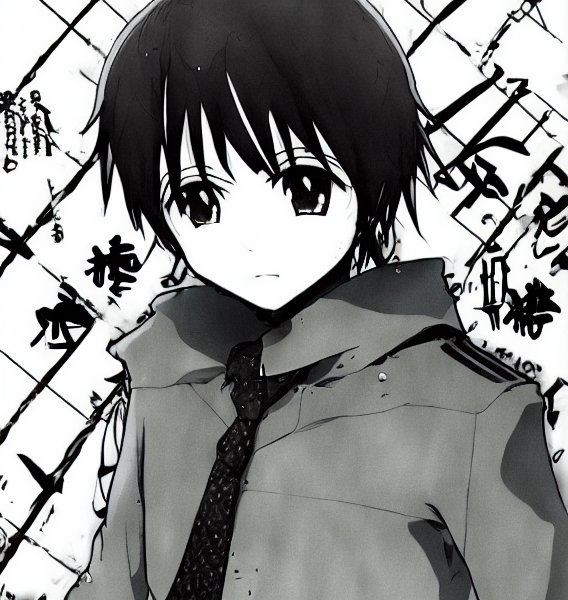

In [94]:
output[0][0]

In [95]:
prompt1 = ["anime, boy, best quality, extremely detailed"] * 4
image3 = load_image("/content/animedude.png")

In [111]:
output = pipe(
    prompt1,
    image3,
    negative_prompt=[""] * 4,
    num_inference_steps=20,
    guidance_scale = 7,
    controlnet_conditioning_scale = 0.2 # specify importance of sketch, or condition passed through controlnet, will get closer to sketch as this increases
)

  0%|          | 0/20 [00:00<?, ?it/s]

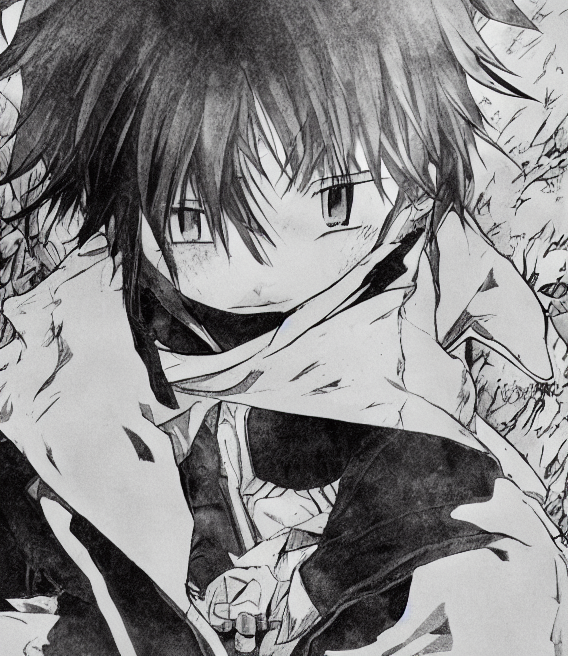

In [112]:
output[0][3]